---
title: "Chapter 2, Part 4: Decision Trees"
subtitle: "Machine Learning"
date: "January 2026"
date-format: "MMMM YYYY"
author: 
  - F.San Segundo & N.Rodríguez
bibliography: ../exclude/mlmiin.bib
execute:
  echo: true
code-overflow: wrap
format: 
  html: 
    toc: true
    code-tools: true
    code-fold: show
    code-summary: "Hide the code"
    embed-resources: true
---

::: {.callout-important}

## COPY THIS NOTEBOOK FIRST

<h2 style="color:blue; font-weight:bold;">Checklist</h2>

+ Have you started Docker Desktop?
+ Have you launched Docker from the `MLMIIN` repository folder?
+ Have you connected VS Code to the running container?

If you have missed any of these steps you may need to restart VS Code after completing them.  
Also if Python seems unresponsive at first, try restarting the kernel.

<h2 style="color:red; font-weight:bold;">IMPORTANT</h2>

+ Remember to **make a copy of this notebook** (in the same folder) before starting to work on it.
+ If you make changes to the original notebook, save it with another name, and use Git to undo the changes in the original notebook (ask for help with this if you need it).

:::  
 

::: {.callout-warning icon=false}

##### Setting the working directory

We begin by using cd to make sure we are in the right folder.

:::

In [1]:
%cd 2_4_Decision_Trees

/wd/2_4_Decision_Trees


# Decision Trees. Introduction

::: {.callout-note icon=false}

## Playing the 20 Questions Game

[The 20 Questions Game](https://en.wikipedia.org/wiki/Twenty_questions) is, according to the Wikipedia, a game in which one player the *"answerer"* chooses something that the other players, the *"questioners"*, must guess. They do that in turns, asking a question which the answerer must answer with "yes" or "no". And they have a total number of twenty questions to find the answer. 

As a birdwatcher, my something is bound to be a bird that I saw once. There are about 11000 species of birds in the world, so you have to think carefully what the relevant questions are for such a classification problem. Those should be the input variables for any *bird classifier* algorithm. This website illustrates the [*state of the art* in Machine Learning applied to bird identification](https://merlin.allaboutbirds.org/).

:::

![](./fig/2_4_MisteryBird.JPG){width=50% fig-align="center" fig-alt="Can you guess the bird in  20 questions?"}

---

::: {.callout-note icon=false}

# Selecting Features and Asking Questions

The decision tree classifier algorithm proceeds in a similar way: given a dataset of well chosen, relevant input variables, **we sequentially ask yes/no questions**. At some point in the identification process we can ask questions like: *Is the wingspan less than 50cm?* Or: *Is the color of the beak red?* Note that the variables involved in these questions can be either numeric of categorical. In the first case our questions will be about inequalities like $X_i < a$. In the second we ask if the factor takes one of its possible values. 

:::

Biologists in particular have been thinking like this for a long time while doing Taxonomy. In your `fig` folder you will find the biologist version of *Twenty Questions* for the birds of the world, in the file [Kimball_2019_OW_supertree_poster.png](./fig/Kimball_2019_OW_supertree_poster.png). And below you can see a [Decision Tree applied to the classical *Iris dataset* (from the scikit-learn website)]().

![](https://miro.medium.com/v2/resize:fit:720/format:png/1*H6thrs5CR_wdxQyMCwWawQ.png){width=50% fig-align="center" fig-alt="A decision tree classifier for the Iris dada set"}


---

::: {.callout-note icon=false}

# Preliminary Ideas about the Decision Tree Algorithm

We will use the following diagram to illustrate the foundations of the Decision Tree algorithm.

:::


![](./fig/2_4_Decision_Tree_01.png){width=60% fig-align="center" fig-alt="Decision Tree Algorithm Preliminary"}

---

::: {.callout-note icon=false}

### Defining Purity

To make the decision tree algorithm work we need a **precise definition of purity.** That is, given a set of samples with a proportion p of them having `Y = 1` (and 1 - p having `Y = 0`) we need to define the number
$$
\text{Purity(p)}
$$
This number should be **a measure of how hard it is to predict the class of a sample chosen at random** from that set. 
Note that purity is symmetric, meaning that we should have 
$$\text{Purity(p)} = \text{Purity(1 - p)}$$
Besides, the maximum value of purity should be for $p = 1/2$ and the minimal should be for $p = 0$ and $p = 1$.

$\quad$

There are many mathematical definitions that verify these requirements, essentially any function with this shape:

:::

![](./fig/2_4_PurityFunction.png){width=50% fig-align="center" fig-alt="Purity Function"}


---

::: {.callout-note icon=false}

### Gini and Entropy Definitions of Purity

Two of the most frquently used measures of purity are **Gini index**:
$$G(p) = 2 p (1 - p)$$
and **entropy** defined as:
$$E(p) = -(p\log(p) + (1- p)\log(1 - p))$$

The *CART decision tree algorithm* uses Gini while C4.5 decision trees use entropy and in scikit-learn you can choose between them. Here we will use Gini's index in the discussion for simplicity in some of the arguments. 

:::



::: {.callout-warning  icon=false}

## Multiclass Problems 

The above discussion and definitions are for the binary classification problem. You can see the extended definitions for multiclass problems in this [Wikipedia page](https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity). 

**Pay attention:** these are truly **measures of impurity**. That is, they decrease as purity increases. 

:::

---

::: {.callout-note icon=false}

### Choosing Optimal Splits

Measuring purity of a set is only a part of what we need to to. In order for the algorithm to be any good we also need to think about the quality of the splits we make. In the previous diagram we clearly made some suboptimal choices when creating the splits. 

:::



::: {.callout-tip  icon=false}

### Exercise 001

If you have not already, go back to the first node of the diagram and ask yourself: what is the optimal split here? And what is the worst split? How are you deciding this?

:::

---

::: {.callout-note icon=false}

### Updating Purity after a Split

Clearly a split is a good split if it leads to **increased purity of the subnodes (decreased Gini)**. We already know how to compute the purity of the two resulting subnodes, but **how do we combine them into a new global measure of purity?**

$\quad$

A this point we need a better playground to test our ideas. So we turn to Python and back to the `Default` dataset that we used to start our discussion of Logistic Regression. The following code loads the dataset (assuming the usual course folder structure) and creates the training and test sets (with our usual name conventions) for you. **Check the code!** 

:::



In [2]:
# Standard Data Science Imports
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [3]:
%run -i "2_4_Default_Dataset.py"
# %load "2_4_Default_Dataset.py"

::: {.callout-tip  icon=false}

### Exercise 002

**Important:** to properly define splits we need the training set to be sorted along the input variable `balance`. Do that now.  
**The code below assumes that the training set is sorted!**  

What is the Gini's purity value for the training set?  Why do we get this value?

:::

In [4]:
%run -i "../exclude/MLMIINprv/exercises/2_4_Exercise003.py"

Initial Gini =  0.06249782986111111


---

::: {.callout-note icon=false}

### Visualize the Set and Think about Splits

We plot the dataset below with a proposal for a tentative split. 

:::

Text(2120, 0.5, 'Split at 2100?')

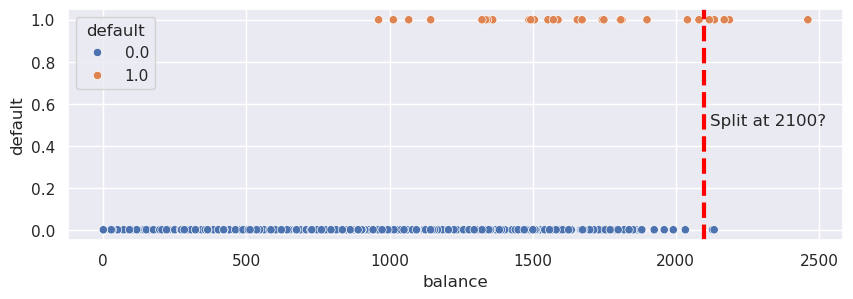

In [5]:
sns.set_theme(rc={'figure.figsize':(10, 3)});
sns.scatterplot(XTR, x = "balance", y=YTR, hue=YTR);
plt.axvline(x=2100, ls="--", c="red", lw=3) 
plt.text(x = 2120, y = 0.5, s="Split at 2100?")

::: {.callout-tip  icon=false}

### Exercise 003

Do you think this split is good enough at increasing purity (decreasing Gini)?

:::

---

::: {.callout-note icon=false}

### Analyzing the purity of the subnodes
To get a full picture of the situation we need more information about the subnodes created by a split. The code in the following script defines a Python function called  `gini_subnodes` that returns the gini index for each of the subnodes, and also the number of sample points in each subnode created by the split. The return value of the function is a 4-tuple with these values (gini_left, gini_right, number_left, number_right).

:::

In [6]:
# %load "2_4_gini_subnodes.py"
%run -i "2_4_gini_subnodes.py"

Let us apply the function to the training set with the split at the suggested value 2100. Try some other values.

In [7]:
gini_l, gini_r, n_l, n_r = gini_subnodes(df = dfTR, var="balance", split=2100)
gini_l, gini_r, n_l, n_r

(np.float64(0.05307588891984114),
 np.float64(0.40816326530612246),
 np.int64(953),
 np.int64(7))

::: {.callout-tip  icon=false}

### Exercise 004

Try some other values. How would you get a combined measure of purity for both nodes?

:::

In [8]:
# %run -i "../exclude/code/2_4_Exercise004.py"

---

::: {.callout-note icon=false}

### Updating Gini after the split

The key idea is that the size of the subnodes matters. A very pure but very small subnode can not have the same influence on the global purity value as a very large but very impure *partner* subnode. We can not take a simple average of both purities. Instead we will consider a weighted average of the subnode purities, using their sizes as weights. 

The following function does just that and returns the updated global gini index after a split. 

:::

In [9]:
def gini_update(df, var, split):
    gini_l, gini_r, n_l, n_r = gini_subnodes(df, var, split)
    n = n_l + n_r
    new_gini = (n_l / n) * gini_l + (n_r / n) * gini_r
    return(new_gini)

::: {.callout-tip  icon=false}

### Exercise 005

Use the function to find the purity if we split at 2100. And then use it to try to find a better, in fact a *very good split*. Can you beat your classmates?

:::

In [10]:
gini_update(dfTR, "balance", 2100)

np.float64(0.05566506770599111)

---

::: {.callout-note icon=false}

## Find the Optimal Position of the Split

Now that we know how to combine the Gini indices of the subnodes, we can take the next step and locate the best possible split. That is, the one that leads to the biggest decrease in the global Gini index (the greatest increase in purity). The way hat a decision tree does this s to consider all possible **split positions**. Those are the midpoints between data points. And then find the associated increases in the global purity. The following code does that. 

:::

In [11]:
balances = dfTR["balance"].values
midpoints = [(balances[k] + balances[k + 1])/2 for k in range(len(balances) - 1)]
newGinis = np.array([gini_update(dfTR, "balance", m) for m in midpoints])
print(f"The new total minimum Gini is %.5f splitting at (midpoint number %d) = %.1f" % (np.min(newGinis), 
                                                                                      np.argmin(newGinis), 
                                                                                      midpoints[np.argmin(newGinis)]))
# sns.lineplot(x=midpoints, y = newGinis)

The new total minimum Gini is 0.05009 splitting at (midpoint number 949) = 2037.0


---

::: {.callout-note icon=false}

## Splits for Factor (Categorical) Inputs

As far as the purity measures are concerned, the only relevant thing about a split is that we have a yes/no question that divides the samples in an existing node into two subnodes. For a numeric input the questions are phrased as inequalities, like the ones we used in the previous examples. For a factor, e.g. color, the question could be about one of its levels, like: *is the color red?* So in this case we can consider a split for each label of the factor. 

:::

::: {.callout-note icon=false}

## Decision Trees with Multidimensional Inputs

What happens if we have a dataset with more than one input variable? Then the method looks for **the best possible split across all variables** and uses that to create the subnodes. Therefore classification trees can deal with an arbitrary number of input variables, at the expense of increased computation time for training.  

:::

---

::: {.callout-note icon=false}

## Hyperparameters for Decision Trees

With a large dataset, with several numeric and factor inputs, a classification tree can grow to be very deep! Letting classification trees grow freely is similar to considering very low values of k in KNN: you are bound to overfit your model to the training dataset. 

In the preliminary discussion at the beginning of this session the depth of the tree was three but one of the green baskets/nodes was not yet pure. A possible way to fight overfilling is to apply some **early stopping** criterion that prevents some nodes from splitting further once that criterion is met. For example, we can say, if the node Gini is already under 0.01, split this node no more.

:::

::: {.callout-note icon=false}

## Feature Selection and Importance in Decision Trees 

Trained decision trees can be used to perform feature selection in a straightforward way: if an input variable is never selected for a split, then the model is telling us that this variable is not relevant for prediction. 

Taking this one step further, **the importance of the variables can be measured by the contribution they make to the splits, weighted by the purity increased of those splits.**

:::

---

# Decision Trees in scikit-learn

::: {.callout-note icon=false}

## Decision Trees for Classification in scikit-learn

We are now ready to use scikit-learn to fit a decision tree model, implemented in the [`DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) class. Visit the documentation there and in particular look at the *parameters* section to see the available early stopping criteria. You can find further information in [this page of the scikit-learn website](https://scikit-learn.org/stable/modules/tree.html#)

:::

::: {.callout-note icon=false}

## Dataset for Model Comparison

To compare with our results from previous sessions we will use the dataset in `SimData0.csv`. The script below prepares the dataset, creating training and test sets.

**Important:** previously we removed `X3` from the dataset because of its high correlation with `X1`. Now we keep it in the dataset to illustrate variable importance in Decision Trees.

:::

In [12]:
%run -i  "./2_4_SimData0_dataset.py"
# XTR

Preprocessing completed. Train and test set created.


In [13]:
dfTR = XTR.copy(); dfTR['Y'] = YTR
dfTS = XTS.copy(); dfTS['Y'] = YTS

---

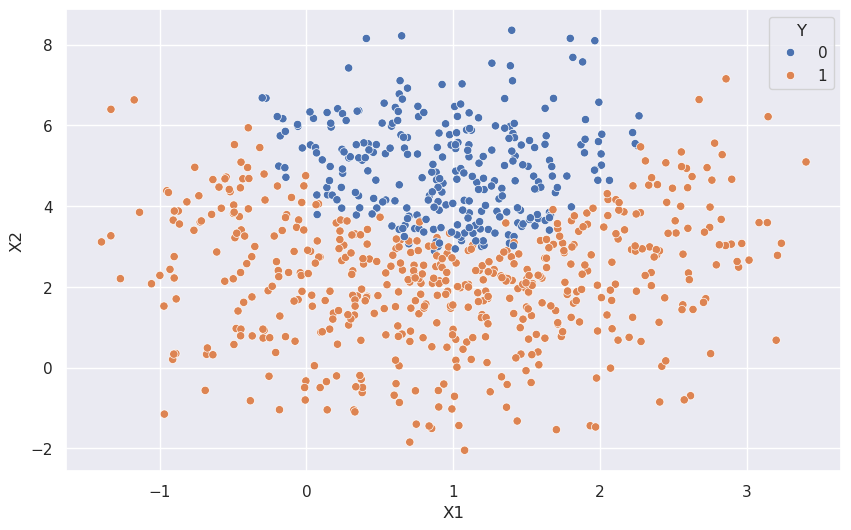

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(dfTR,  x="X1", y="X2", hue="Y");
plt.show();plt.close()

---

::: {.callout-note icon=false}

## Creating a Pipeline for the Decision Tree

The preprocessing part of the pipeline should be familiar by now. 

:::

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

num_transformer = Pipeline(
    steps=[("scaler", StandardScaler())]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_inputs),
        ("cat", "passthrough", ohe_inputs),
    ]
)

::: {.callout-note icon=false}

## Early Stopping Based on Maximum Tree Depth

Now we create a hyperparameter grid that controls the depth of the trained trees, and add the modeling step to the pipeline. 

:::

In [16]:
hyp_grid = {'Dtree__max_depth': range(2, 10)} 

from sklearn.tree import DecisionTreeClassifier
DecTree_pipe = Pipeline(steps=[('preproc', preprocessor), 
                           ('Dtree', DecisionTreeClassifier(criterion='gini', 
                                                     random_state=1))]) 

---

::: {.callout-note icon=false}

## Using this Pipeline with Grid Search and Cross-Validation

We use `GridSearchCV` to search optimal hyperparameter values with 10-fold cross validation.  

::: 

In [17]:
num_folds = 10

from sklearn.model_selection import GridSearchCV

DecTree_gridCV = GridSearchCV(estimator=DecTree_pipe, 
                        param_grid=hyp_grid, 
                        cv=num_folds,
                        return_train_score=True)

::: {.callout-note icon=false}

## Model Fit

And remember to call the `fit` method on the training data!

::: 

In [18]:
DecTree_gridCV.fit(XTR, YTR)

,estimator,Pipeline(step...om_state=1))])
,param_grid,"{'Dtree__max_depth': range(2, 10)}"
,scoring,None
,n_jobs,None
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,transformers,"[('num', ...), ('cat', ...)]"


---

---

::: {.callout-note icon=false}

## Visualizing the Grid Search with CV: Validation Curve

This is one of the first things we should examine after model fitting. Recall: the red dots are the mean validation scores for each value of k and blue vertical bars show the variability of the validation score over the 10 folds. 

::: 

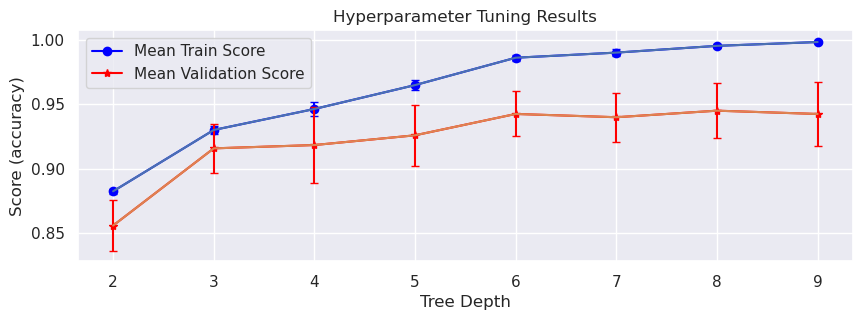

In [ ]:
param_values = DecTree_gridCV.cv_results_[f'param_Dtree__max_depth']

mean_train_scores = DecTree_gridCV.cv_results_['mean_train_score']
plt.plot(param_values, mean_train_scores, marker='o', label='Mean Train Score', color='blue')
# Add error bars over the ten validation folds
std_train_scores = DecTree_gridCV.cv_results_['std_train_score']
plt.errorbar(param_values, 
                 mean_train_scores, 
                 yerr=std_train_scores, capsize=3,
                 ecolor='blue')

mean_test_scores = DecTree_gridCV.cv_results_['mean_test_score']
plt.plot(param_values, mean_test_scores, marker='*', label='Mean Validation Score', color="red")
std_test_scores = DecTree_gridCV.cv_results_['std_test_score']
plt.errorbar(param_values, 
                 mean_test_scores, 
                 yerr=std_test_scores, capsize=3,
                 ecolor='red')
plt.xlabel('Tree Depth')
plt.ylabel('Score (accuracy)')
plt.title('Hyperparameter Tuning Results')
plt.legend()  # Add a legend to the plot
plt.show()
plt.close()


::: {.callout-note icon=false}

### How do we use these curves to detect overfitting?

As the complexity of the model increases (in this case that means higher values of `max_depth`), the training score (accuracy) curve will climb steadily toward 1.0 (100%). Meanwhile the validation accuracy score will initially rise as the tree becomes deeper, it will reach a peak (the optimal depth) and then start to decrease. Overfitting is signaled when the training accuracy continues to climb toward 1.0, but the validation accuracy starts to drop. The vertical gap between both curves widens, showing that the model is losing its ability to generalize. This we would select the hyperparameter value for which the validation score is maximal. However, if the validation curve plateus (becomes flat) close to the top, it is better to choose the simplest model, as it will probably have better performance on future  data. 

:::

### Validation Curve with scikit built-in functions

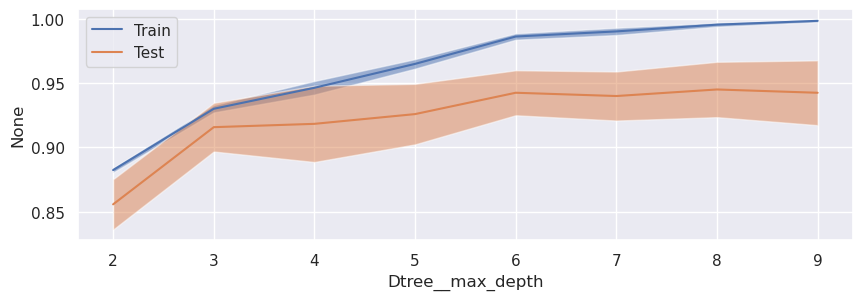

In [ ]:
from sklearn.model_selection import validation_curve, ValidationCurveDisplay

param_range = hyp_grid['Dtree__max_depth']

train_scores, test_scores = validation_curve(
    DecTree_gridCV.best_estimator_,
    XTR,
    YTR,
    param_name='Dtree__max_depth',
    param_range=param_range,
    cv=10,
    scoring='accuracy',
    n_jobs=-1
)   

ValidationCurveDisplay(
    param_name='Dtree__max_depth',
    param_range=param_range,
    train_scores=train_scores,
    test_scores=test_scores).plot()

plt.show();plt.close()

### Learning Curve

In [ ]:
from sklearn.model_selection import LearningCurveDisplay, learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    DecTree_gridCV.best_estimator_,
    XTR,
    YTR,
    cv=10,
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy'
)

In [ ]:
XTR.shape, train_sizes

((783, 5), array([ 70, 140, 211, 281, 352, 422, 492, 563, 633, 704]))

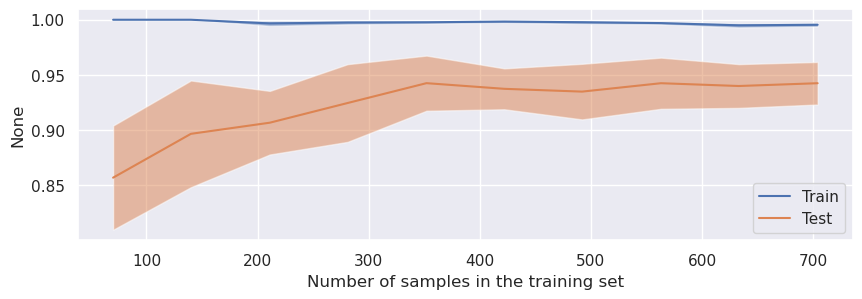

In [ ]:
# Display the learning curve
LearningCurveDisplay(
    train_sizes=train_sizes,
    train_scores=train_scores,
    test_scores=test_scores).plot()
plt.show();plt.close()

The plot shows that the selected hyperparameter corresponds to a tree with depth equal to:

In [ ]:
mean_train_scores


array([0.88236178, 0.93004211, 0.94636202, 0.96495104, 0.9862359 ,
       0.99020813, 0.99545858, 0.99843911])

In [ ]:
mean_test_scores

array([0.85571243, 0.91574164, 0.91832197, 0.92590068, 0.94250243,
       0.93995456, 0.94505031, 0.94248621])

In [ ]:
DecTree_gridCV.best_params_

{'Dtree__max_depth': 8}

::: {.callout-note icon=false}

## And Visualizing the Decision Tree

Uncomment and run the following code to see the trained tree model
::: 

In [23]:
# from sklearn.tree import plot_tree
# plt.figure(figsize=(60, 60))
# plot_tree(DecTree_gridCV.best_estimator_['Dtree'], filled=True)
# plt.show()

---

# Model Performance Evaluation

::: {.callout-note  icon=false}

### Predictions and Performance Measures

This is similar to what we have already done for previous models so we will proceed quickly through this. We begin by looking at the scores in training and test.

:::

In [24]:
DecTree_gridCV.score(XTR, YTR), DecTree_gridCV.score(XTS, YTS)

(0.9936143039591315, 0.9296482412060302)

There is a large difference between the result in training and test, **this model is overfitting!**

---

::: {.callout-note  icon=false}

### Datasets for Predictions

Next we create datasets to store predictions. The next cell makes it easier to adapt this code for other model types.

:::

In [25]:
model = DecTree_gridCV
model_name = "Dtree"

In [26]:
# Dataset for Training Predictions
dfTR_eval = XTR.copy()
dfTR_eval['Y'] = YTR 


In [27]:
# Store the actual predictions
newCol = 'Y_'+ model_name +'_prob_neg'; 
dfTR_eval[newCol] = model.predict_proba(XTR)[:, 0]
newCol = 'Y_'+ model_name +'_prob_pos'; 
dfTR_eval[newCol] = model.predict_proba(XTR)[:, 1]
newCol = 'Y_'+ model_name +'_pred'; 
dfTR_eval[newCol] = model.predict(XTR)

In [28]:
# Test predictions dataset
dfTS_eval = XTS.copy()
dfTS_eval['Y'] = YTS 
newCol = 'Y_'+ model_name +'_prob_neg'; 
dfTS_eval[newCol] = model.predict_proba(XTS)[:, 0]
newCol = 'Y_'+ model_name +'_prob_pos'; 
dfTS_eval[newCol] = model.predict_proba(XTS)[:, 1]
newCol = 'Y_'+ model_name +'_pred'; 
dfTS_eval[newCol] = model.predict(XTS)

---

::: {.callout-note  icon=false}

### Confusion Matrices

The comparison of the confusion matrices also indicates overfitting.

:::

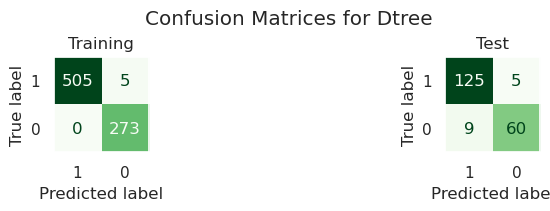

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fig = plt.figure(constrained_layout=True, figsize=(6, 2))
spec = fig.add_gridspec(1, 3)
ax1 = fig.add_subplot(spec[0, 0]);ax1.set_title('Training'); ax1.grid(False)
ax2 = fig.add_subplot(spec[0, 2]);ax2.set_title('Test'); ax2.grid(False)
ConfusionMatrixDisplay.from_estimator(model, XTR, YTR, cmap="Greens", colorbar=False, ax=ax1, labels=[1, 0])
ConfusionMatrixDisplay.from_estimator(model, XTS, YTS, cmap="Greens", colorbar=False, ax=ax2, labels=[1, 0])
plt.suptitle("Confusion Matrices for "+ model_name)
plt.show(); 

---

::: {.callout-note  icon=false}

### ROC Curves

Again, note the difference.

:::

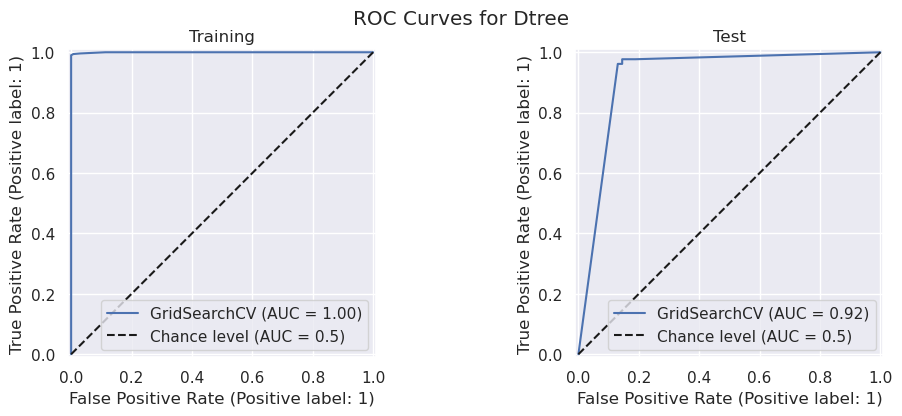

In [30]:
from sklearn.metrics import RocCurveDisplay
fig = plt.figure(figsize=(12, 4))
spec = fig.add_gridspec(1, 2)
ax1 = fig.add_subplot(spec[0, 0]);ax1.set_title('Training')
ax2 = fig.add_subplot(spec[0, 1]);ax2.set_title('Test')
RocCurveDisplay.from_estimator(model, XTR, YTR, plot_chance_level=True, ax=ax1)
RocCurveDisplay.from_estimator(model, XTS, YTS, plot_chance_level=True, ax=ax2);
plt.suptitle("ROC Curves for "+ model_name)
plt.show(); 

---

::: {.callout-note  icon=false}

### Calibration Curves

And finally let us look at the calibration curves. 

:::

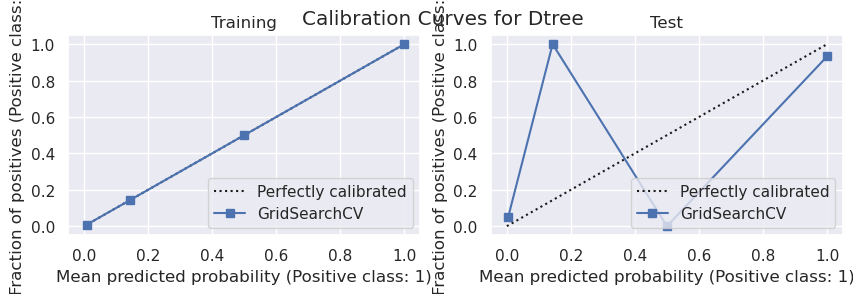

In [31]:
from sklearn.calibration import CalibrationDisplay
fig = plt.figure(figsize=(10, 2.6)); spec = fig.add_gridspec(1, 2)
ax1 = fig.add_subplot(spec[0, 0]);ax1.set_title('Training')
ax2 = fig.add_subplot(spec[0, 1]);ax2.set_title('Test')
CalibrationDisplay.from_estimator(model, XTR, YTR, n_bins=10, ax=ax1)
CalibrationDisplay.from_estimator(model, XTS, YTS, n_bins=10, ax=ax2);
plt.suptitle("Calibration Curves for "+ model_name);plt.show()

---

::: {.callout-tip  icon=false}

### Exercise 006

Why are there so few probability values in these plots? Open the pdf file [2_4_Fitted_Tree_Exploration.pdf](./2_4_Fitted_Tree_Exploration.pdf) and try to find the answer.

:::

::: {.callout-note  icon=false}

### Variable Importance...

Before fitting this model we mentioned that decision trees provide a measure of variable importance. In our case we can get it from the fitted model as follows.

**Important:** Do not read too much into the importance values *per se*. They are relative measures, often normalized to sum one.
:::

In [32]:
var_importances = pd.DataFrame({'var':XTR.columns, 
                                'importance': DecTree_gridCV.best_estimator_['Dtree'].feature_importances_}
                                ).sort_values(by="importance", ascending = False)
var_importances

,var,importance
1,X2,0.569743
0,X1,0.369363
2,X3,0.055972
3,X4_A,0.004923
4,X4_B,0.000000


---

::: {.callout-note  icon=false}

### ...and Feature Selection. Creating a Second Decision Tree Model

The result can ve used to select relevant features, discard those whose importance is below a given threshold, and fit a new model.

In this and the following models we will identify the model and its inputs  with standard names so that you can reuse as much of the preceding code as possible. 

:::

In our case we will discard `X_3` and `X_4` and **fit a new model**.

In [33]:
DTree2_inputs = ['X1', 'X2']

::: {.callout-note  icon=false}

### New Pipeline

The pipeline preprocessing step now only needs scaling.

:::

In [34]:
DTree2_pipe = Pipeline(steps=[('scaler', StandardScaler()), 
                           ('Dtree', DecisionTreeClassifier(criterion='gini', 
                                                            random_state=1))]) 



---

::: {.callout-note  icon=false}

### Grid Search and Model Fit

This proceeds just like before, with the new pipeline.

:::

In [35]:
DTree2_gridCV = GridSearchCV(estimator=DTree2_pipe, 
                        param_grid=hyp_grid, 
                        cv=num_folds,
                        return_train_score=True)
                        
DTree2_gridCV.fit(dfTR[DTree2_inputs], dfTR["Y"]);

::: {.callout-note  icon=false}

### Python Code to Ease Model Comparison

In the next section we will compare this model with other models that we have trained in previous sessions. To make our code easy to reuse we create a Python dictionary of models to store the information we need to identify a model (in fact, a dictionary of model dictionaries).

:::

In [36]:
modelDict = {}

model_name = "DTree2"
model = DTree2_gridCV
model_inputs = DTree2_inputs


modelDict = {model_name : {"model" : model, "inputs" : model_inputs}}

In [37]:
modelDict

{'DTree2': {'model': GridSearchCV(cv=10,
               estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                         ('Dtree',
                                          DecisionTreeClassifier(random_state=1))]),
               param_grid={'Dtree__max_depth': range(2, 10)},
               return_train_score=True),
  'inputs': ['X1', 'X2']}}

---

::: {.callout-tip  icon=false}

### Exercise 007

Uncomment and run the following code cell to do a model performance analysis for this model. **Study the code!** What improvements do you see (if any) in this second model?

:::

In [38]:
# %run -i "./2_4_Performance_Analysis_Binary_Classifier.py"

::: {.callout-tip  icon=false}

### Exercise 008

What kind of decision boundary do you expect from a decision tree? **After thinking  about that,** uncomment and run the following code cell to plot the decision boundary for this model. Remember, **this only works for models with two numerical inputs.**

:::

In [39]:
# %run -i "./2_4_DecisionBoundary_2d_BinaryClassifier.py"

::: {.callout-tip  icon=false}

### Exercise 009

Uncomment and run the following code cell to plot the fitted tree for this model. 

:::

In [40]:
# %run -i "./2_4_Plot_Decision_Tree.py"

---

# Model Comparison and Non Linear Terms in Logistic Regression Models

We have already trained several different types of models for this dataset. Now we will compare three models, each of a different type. The first one will be a logistic regression model. But recall that EDA has shown that the decision boundary in the `X_1`, `X_2`plane is non linear. To account for this, we will refit the model but beforehand we add a new column to the dataset, containing the squares of the values of `X1`.

In [41]:
dfTR["X1Sq"] = dfTR["X1"]**2
dfTS["X1Sq"] = dfTS["X1"]**2

In [42]:
dfTR.head()

,X1,X2,X3,X4_A,X4_B,Y,X1Sq
330,-0.872251,3.880004,3.277006,0.0,1.0,1,0.760822
461,1.635310,2.479698,0.587786,1.0,0.0,1,2.674240
945,1.109288,3.833267,1.272913,1.0,0.0,0,1.230521
248,1.681831,3.054278,0.471680,1.0,0.0,1,2.828554
398,0.606376,1.511992,1.434848,0.0,1.0,1,0.367692


::: {.callout-tip  icon=false}

### Exercise 010

Can we apply this transformation to the test set? Are we *leaking information*?

:::

---

::: {.callout-note  icon=false}

### Logistic Regression with Non Linear Terms. Pipeline and Fit

Now we fit this model. Note again that preprocessing comes down to scaling the (now exclusively) numerical inputs. 

We use the model dictionary to store the results.

:::

In [43]:
model_name = "LogReg"
model_inputs = ["X1", "X2", "X1Sq"]

from sklearn.linear_model import LogisticRegression
LogReg_pipe = Pipeline(steps=[('scaler', StandardScaler()),
                        ('LogReg', LogisticRegression(penalty=None))]) 

LogReg_pipe.named_steps['scaler'].set_output(transform='pandas')

LogReg_pipe.fit(dfTR[model_inputs], YTR);

LogReg_coeff = np.hstack((LogReg_pipe.named_steps["LogReg"].intercept_[np.newaxis, :], 
                          LogReg_pipe.named_steps["LogReg"].coef_))
print(LogReg_coeff)

model = LogReg_pipe
modelDict[model_name] =  {"model" : model, "inputs" : model_inputs}

[[  7.57332038 -18.94625368 -13.64390028  21.18728811]]


---

::: {.callout-note  icon=false}

### Coefficients of the Model

For a Logistic Regression model like this we can use the statistical significance tests for the model coefficients:

:::

In [44]:
import statsmodels.api as sm
XTR_sm = sm.add_constant(LogReg_pipe.named_steps['scaler'].transform(dfTR[model_inputs]))
XTR_sm

,const,X1,X2,X1Sq
330,1.0,-1.978462,0.368036,-0.483531
461,1.0,0.729319,-0.344977,0.425124
945,1.0,0.161296,0.344238,-0.260478
248,1.0,0.779554,-0.052410,0.498405
398,1.0,-0.381772,-0.837718,-0.670223
...,...,...,...,...
353,1.0,0.610771,0.282255,0.260336
147,1.0,0.149271,1.133083,-0.272152
540,1.0,-0.857866,1.474887,-0.831830
936,1.0,-0.678704,-0.830746,-0.792680


In [45]:
logis_mod_sm = sm.Logit(YTR, XTR_sm)
logis_mod_sm_res = logis_mod_sm.fit()
logis_mod_sm_res.summary()

Optimization terminated successfully.
         Current function value: 0.080700
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      Y   No. Observations:                  783
Model:                          Logit   Df Residuals:                      779
Method:                           MLE   Df Model:                            3
Date:                Wed, 04 Feb 2026   Pseudo R-squ.:                  0.8752
Time:                        11:52:44   Log-Likelihood:                -63.188
converged:                       True   LL-Null:                       -506.30
Covariance Type:            nonrobust   LLR p-value:                8.634e-192
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.5643      1.030      7.347      0.000       5.546       9.582
X1           -18.9182      2.571     -7.358      0.000     -23.957     -13.879
X2           -13.6264      1.810     -7.529      0.000     -17.174     -10.079
X1Sq          21.1571      2.868      7.377      0.000      15.536      26.778
==============================================================================

Possibly complete quasi-separation: A fraction 0.60 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

As you can see all the coefficients are significative, including the one for the square of `X1`.

---

::: {.callout-tip  icon=false}

### Exercise 011

Uncomment and run the following two code cells to analyze the model's performance and to see its decision boundary. 

:::

dfTR already exists
Model LogReg with model inputs ['X1', 'X2', 'X1Sq']

        Model score in Training = 0.97
        Model score in Test = 0.96
        


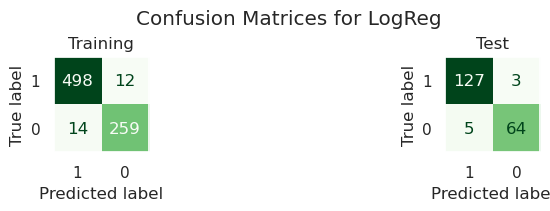

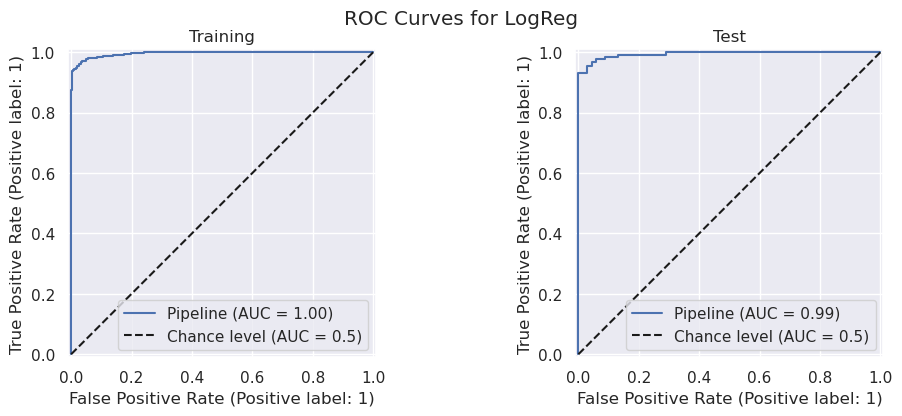

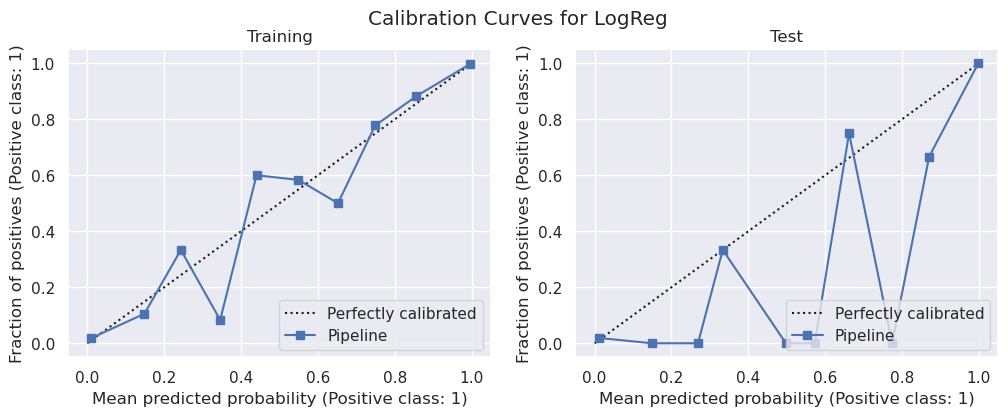

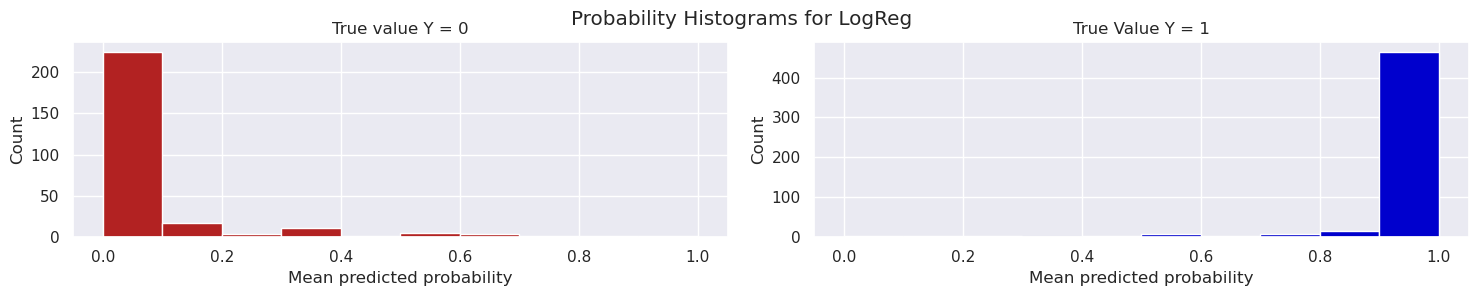

In [46]:
%run -i "./2_4_Performance_Analysis_Binary_Classifier.py"
# dfTR.head

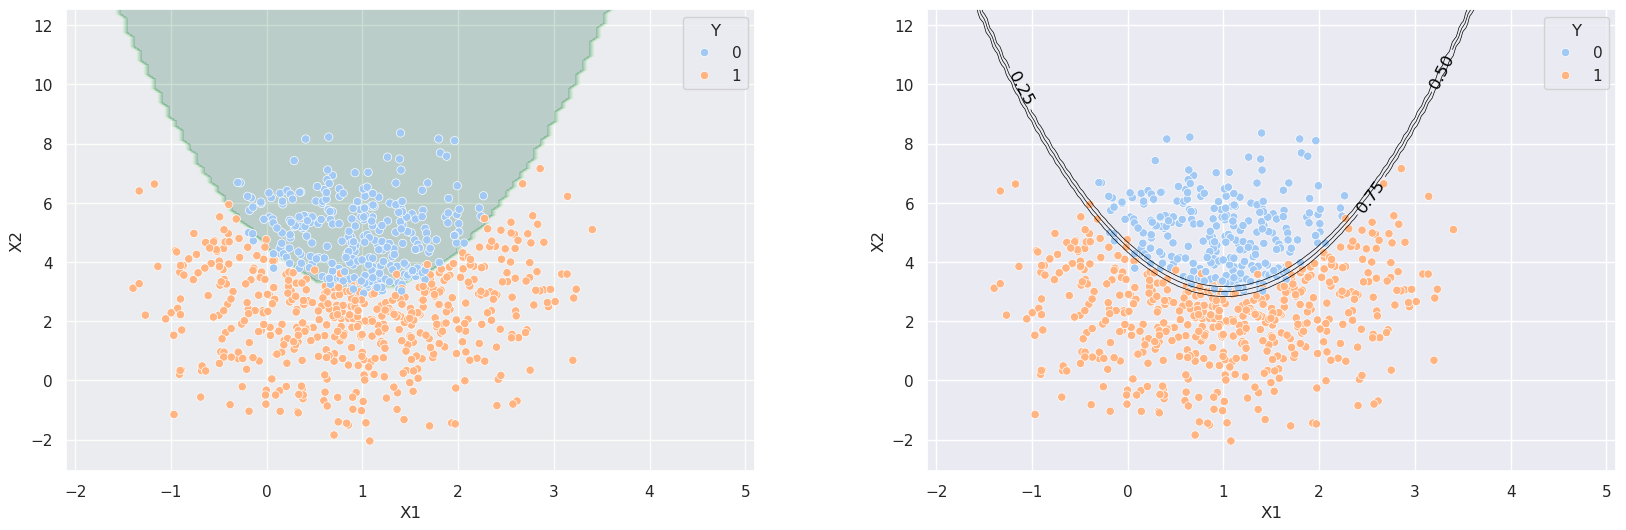

In [47]:
%run -i "./2_4_DecisionBoundary_LogisticRegression.py"

---

::: {.callout-note  icon=false}

### KNN Model Using The Selected Festures

For our next model we will use KNN, but with inputs restricted to `X1` and `X2`.
:::

In [48]:
model_name = "knn"
model_inputs = ["X1", "X2"]

k_values = np.ceil(np.linspace(3, XTR.shape[0] / 2, num=15)).astype("int").tolist()
k_values
hyp_grid = {'knn__n_neighbors': k_values} 

from sklearn.neighbors import KNeighborsClassifier
knn_pipe = Pipeline(steps=[('scaler', StandardScaler()), 
                           ('knn', KNeighborsClassifier())])

from sklearn.model_selection import GridSearchCV

knn_gridCV = GridSearchCV(estimator=knn_pipe, 
                        param_grid=hyp_grid, 
                        cv=num_folds,
                        return_train_score=True)

knn_gridCV.fit(dfTR[model_inputs], dfTR["Y"])

model = knn_gridCV
modelDict[model_name] =  {"model" : model, "inputs" : model_inputs}

In [49]:
modelDict

{'DTree2': {'model': GridSearchCV(cv=10,
               estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                         ('Dtree',
                                          DecisionTreeClassifier(random_state=1))]),
               param_grid={'Dtree__max_depth': range(2, 10)},
               return_train_score=True),
  'inputs': ['X1', 'X2']},
 'LogReg': {'model': Pipeline(steps=[('scaler', StandardScaler()),
                  ('LogReg', LogisticRegression(penalty=None))]),
  'inputs': ['X1', 'X2', 'X1Sq']},
 'knn': {'model': GridSearchCV(cv=10,
               estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                         ('knn', KNeighborsClassifier())]),
               param_grid={'knn__n_neighbors': [3, 31, 59, 87, 114, 142, 170, 198,
                                                225, 253, 281, 309, 336, 364,
                                                392]},
               return_train_score=True),
  'inputs': 

---

::: {.callout-tip  icon=false}

### Exercise 012

As before, uncomment and run the following two code cells to learn about the model's performance and decision boundary. 

:::

Model knn with model inputs ['X1', 'X2']

        Model score in Training = 0.98
        Model score in Test = 0.94
        


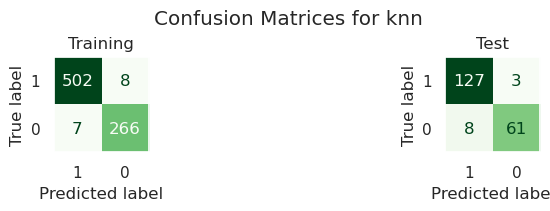

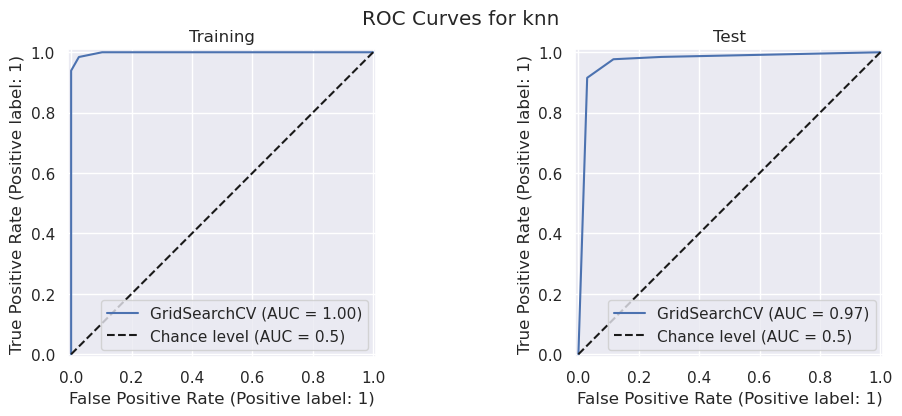

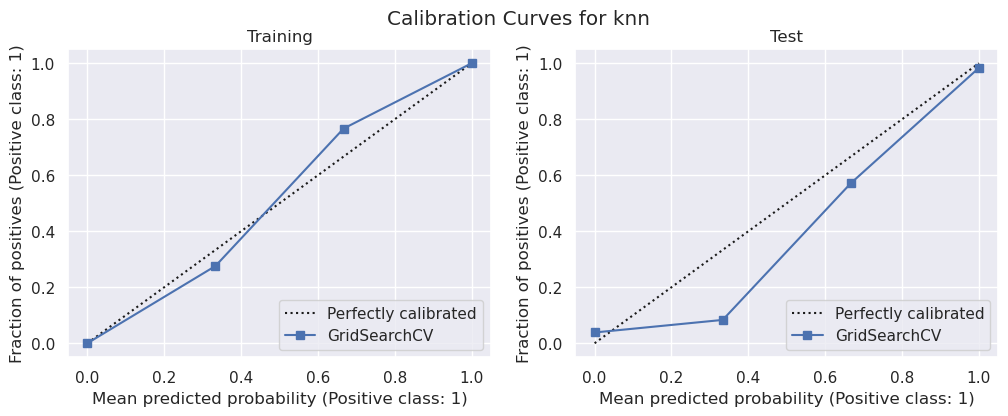

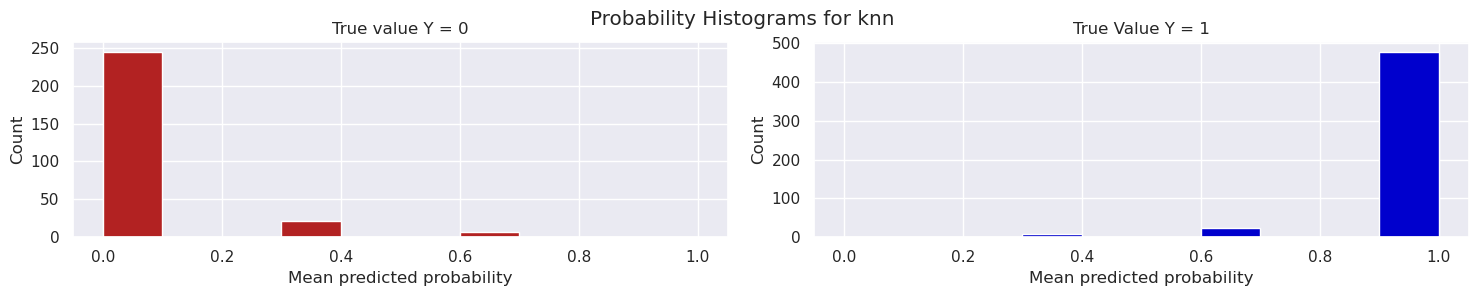

In [50]:
# %load "./2_4_Performance_Analysis_Binary_Classifier.py"
# Performance Analysis of a Binary Classification Model

if 'dfTR' not in globals():
    dfTR = dfTR_eval.copy()
if 'dfTS' not in globals():
    dfTS = dfTS_eval.copy()

## Training predictions dataset

model = modelDict[model_name]["model"]
model_inputs = modelDict[model_name]["inputs"]
print("Model %s with model inputs %s"%(model_name, str(model_inputs)) )

newCol = 'Y_'+ model_name +'_prob_neg'; 
dfTR_eval[newCol] = model.predict_proba(dfTR[model_inputs])[:, 0]
newCol = 'Y_'+ model_name +'_prob_pos'; 
dfTR_eval[newCol] = model.predict_proba(dfTR[model_inputs])[:, 1]
newCol = 'Y_'+ model_name +'_pred'; 
dfTR_eval[newCol] = model.predict(dfTR[model_inputs])
# Test predictions dataset
dfTS_eval = dfTS[model_inputs].copy()
dfTS_eval['Y'] = YTS 
newCol = 'Y_'+ model_name +'_prob_neg'; 
dfTS_eval[newCol] = model.predict_proba(dfTS[model_inputs])[:, 0]
newCol = 'Y_'+ model_name +'_prob_pos'; 
dfTS_eval[newCol] = model.predict_proba(dfTS[model_inputs])[:, 1]
newCol = 'Y_'+ model_name +'_pred'; 
dfTS_eval[newCol] = model.predict(dfTS[model_inputs])

print(f'''
        Model score in Training = %.2f
        Model score in Test = %.2f
        '''%(
            # str(model.best_params_) ,     
           model.score(dfTR[model_inputs], YTR), 
        #    model.best_score_,
           model.score(dfTS[model_inputs], YTS)))

#       '''%(str(model.best_params_) , 
        # Model score in Validation = %.2f

### Confusion Matrices


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fig = plt.figure(constrained_layout=True, figsize=(6, 2))
spec = fig.add_gridspec(1, 3)
ax1 = fig.add_subplot(spec[0, 0]);ax1.set_title('Training'); ax1.grid(False)
ax2 = fig.add_subplot(spec[0, 2]);ax2.set_title('Test'); ax2.grid(False)
ConfusionMatrixDisplay.from_estimator(model, dfTR[model_inputs], YTR, cmap="Greens", colorbar=False, ax=ax1, labels=[1, 0])
ConfusionMatrixDisplay.from_estimator(model, dfTS[model_inputs], YTS, cmap="Greens", colorbar=False, ax=ax2, labels=[1, 0])
plt.suptitle("Confusion Matrices for "+ model_name)
plt.show(); 

### ROC Curves

from sklearn.metrics import RocCurveDisplay
fig = plt.figure(figsize=(12, 4))
spec = fig.add_gridspec(1, 2)
ax1 = fig.add_subplot(spec[0, 0]);ax1.set_title('Training')
ax2 = fig.add_subplot(spec[0, 1]);ax2.set_title('Test')
RocCurveDisplay.from_estimator(model, dfTR[model_inputs], YTR, plot_chance_level=True, ax=ax1)
RocCurveDisplay.from_estimator(model, dfTS[model_inputs], YTS, plot_chance_level=True, ax=ax2);
plt.suptitle("ROC Curves for "+ model_name)
plt.show(); 

### Calibration Curves

from sklearn.calibration import CalibrationDisplay
fig = plt.figure(figsize=(12, 4))
spec = fig.add_gridspec(1, 2)
ax1 = fig.add_subplot(spec[0, 0]);ax1.set_title('Training')
ax2 = fig.add_subplot(spec[0, 1]);ax2.set_title('Test')
CalibrationDisplay.from_estimator(model, dfTR[model_inputs], YTR, n_bins=10, ax=ax1)
CalibrationDisplay.from_estimator(model, dfTS[model_inputs], YTS, n_bins=10, ax=ax2);
plt.suptitle("Calibration Curves for "+ model_name)
plt.show(); plt.rcParams['figure.figsize']=plt.rcParamsDefault['figure.figsize']


### Probability Histograms


from matplotlib.gridspec import GridSpec

# clf_list = [(LogReg_pipe, "Logistic Regression")]
fig = plt.figure(figsize=(15, 3))
gs = GridSpec(1, 2)

plt.subplots_adjust(left=1.2, bottom=0.4, right=1.5, top=1, wspace=1, hspace=0.1)
grid_positions = [(0, 0), (0, 1)]

row, col = [0, 0]
ax = fig.add_subplot(gs[row, col])

ax.hist(
    dfTR_eval.loc[(dfTR_eval["Y"] == 0)]['Y_'+ model_name +'_prob_pos'],
    range=(0, 1),
    bins=10,
    # label= f'Prediction Y = 0',
    color="firebrick",
)
ax.set(title=f'True value Y = 0', xlabel="Mean predicted probability", ylabel="Count")

row, col = [0, 1]
ax = fig.add_subplot(gs[row, col])

ax.hist(
    dfTR_eval.loc[(dfTR_eval["Y"] == 1)]['Y_'+ model_name +'_prob_pos'],
    range=(0, 1),
    bins=10,
    # label= f'Prediction Y = 0',
    color="mediumblue",
)

ax.set(title=f'True Value Y = 1', xlabel="Mean predicted probability", ylabel="Count")

plt.tight_layout()
plt.suptitle("Probability Histograms for "+ model_name)

plt.show() 

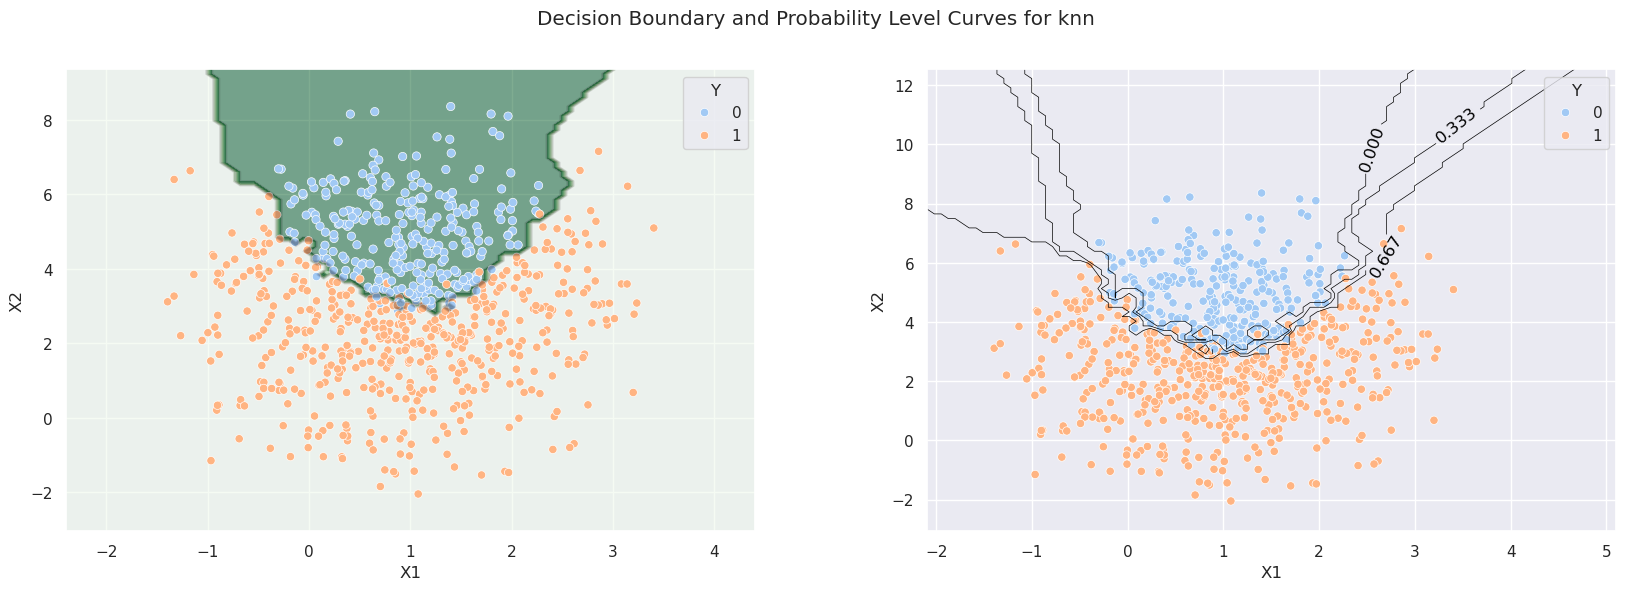

In [51]:
%run -i "./2_4_DecisionBoundary_2d_BinaryClassifier.py"

---

::: {.callout-note  icon=false}

### Comparing the Models Using Test Set Scores

The first model comparison will be the accuracy of each model using the predictions for the test set.

:::

In [52]:
for ml in modelDict.keys():
    print(ml)
    print(f"Test score for %s = %.3f"%(ml, modelDict[ml]["model"].score(dfTS[modelDict[ml]["inputs"]], YTS)))

DTree2
Test score for DTree2 = 0.945
LogReg
Test score for LogReg = 0.960
knn
Test score for knn = 0.945



The results suggest that the quadratic term has been very successful at increasing the predictive performance of the logistic model. 

::: {.callout-tip  icon=false}

### Exercise 013

Do you think that adding the same column to the decision tree will have a similar impact? What about knn?  
**Extra exercise:** do it and see if the result agree with yor thoughts,

:::

---

::: {.callout-note  icon=false}

### Looking at Validation Scores

To get a robust assessment of the model comparison we use cross validation scores on the training set. And we plot their distribution using parallel boxplots.

:::

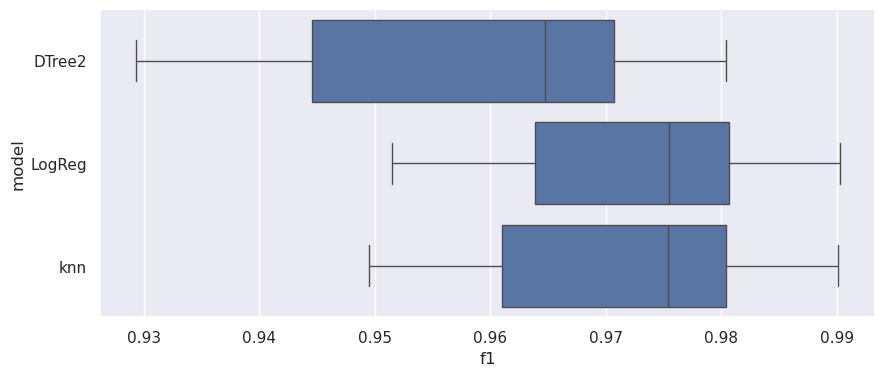

In [53]:
from sklearn.model_selection import cross_val_score
metric = 'f1'

score = {ml:cross_val_score(modelDict[ml]["model"], dfTR[modelDict[ml]["inputs"]], dfTR["Y"], 
                            cv=10, scoring=metric) for ml in modelDict.keys()}
fig = plt.figure(figsize=(10, 4))
model_scores = pd.DataFrame(score)

sns.boxplot(model_scores.melt(var_name="model", value_name=metric), x=metric, y ="model");

---

::: {.callout-note  icon=false}

### ROC Curves for Comparison

The ROC curves again show the same ordering of the models, from the probabilistic perspective.

:::

<Figure size 600x400 with 0 Axes>

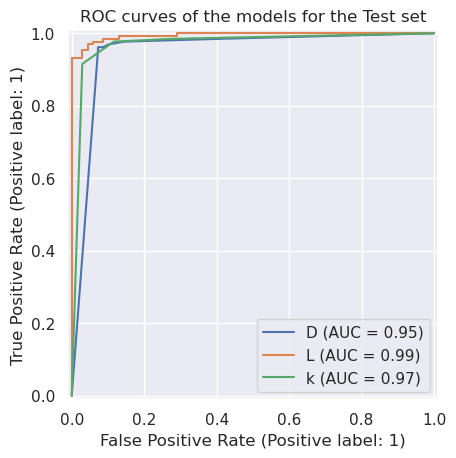

In [54]:
from sklearn.metrics import RocCurveDisplay
plt.figure(figsize=(6, 4))
fig, ax = plt.subplots()

for ml in modelDict.keys():
    RocCurveDisplay.from_estimator(modelDict[ml]["model"], 
                                   dfTS[modelDict[ml]["inputs"]], dfTS["Y"], 
                                   ax=ax,  name=ml[0], pos_label=1)
plt.title("ROC curves of the models for the Test set")
plt.show()

---

::: {.callout-note  icon=false}

### Calibration Curves for Comparison

In this case the curves show that none of the models is really well calibrated. 

:::

<Figure size 1200x1200 with 0 Axes>

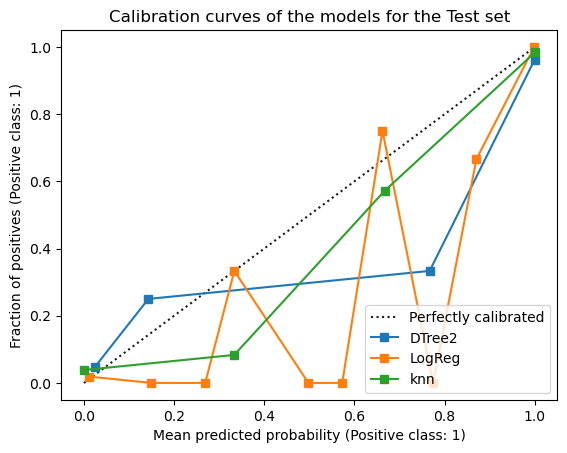

In [55]:
plt.rcdefaults();
from sklearn.calibration import CalibrationDisplay
plt.figure(constrained_layout=False, figsize=(12, 12))
fig, ax = plt.subplots()
for ml in modelDict.keys():
    CalibrationDisplay.from_estimator(modelDict[ml]["model"],
                                      dfTS[modelDict[ml]["inputs"]], dfTS["Y"],
                                      n_bins=10,
                                      ax=ax,  name=ml, pos_label=1)
plt.title("Calibration curves of the models for the Test set")
plt.show()

::: {.callout-tip  icon=false}

### Exercise 014

Why do you think this calibration curves are this far from ideal?

:::

---

::: {.callout-note  icon=false}

## In the Next Session

We will discuss some extensions of the decision tree model, namely the Random Forest and XGBoost modeling methods.

:::

# References